In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.set_style('white')
#Input data
in_file = '../data/just_err_betas.csv'
df = pd.read_csv(in_file)

In [2]:
df

,File,HIV,CB,correct,error
0,193/func/sub-193-eat_inhib.nii.gz_REML+tlrc[3],0,1,-0.127954,-1.336412
1,194/func/sub-194-eat_inhib.nii.gz_REML+tlrc[3],0,1,-0.396820,-1.320185
2,198/func/sub-198-eat_inhib.nii.gz_REML+tlrc[3],0,1,0.199256,-0.434548
3,217/func/sub-217-eat_inhib.nii.gz_REML+tlrc[3],0,1,0.743078,-0.785726
4,283/func/sub-283-eat_inhib.nii.gz_REML+tlrc[3],0,1,0.125248,-1.205620
...,...,...,...,...,...
98,363/func/sub-363-eat_inhib.nii.gz_REML+tlrc[3],1,2,0.361519,0.199944
99,366/func/sub-366-eat_inhib.nii.gz_REML+tlrc[3],1,2,0.229637,1.246128
100,375/func/sub-375-eat_inhib.nii.gz_REML+tlrc[3],1,2,-0.061377,-0.720475
101,392/func/sub-392-eat_inhib.nii.gz_REML+tlrc[3],1,2,0.176465,0.109127


In [3]:
df[['HIV', 'CB']]
df['HIV-status'] = df['HIV'].map({0: 'HIV-', 1: 'HIV+'})
df['CB-status'] = df['CB'].map({1: 'non-user', 2: 'user'})
df['group'] = df['HIV-status'] + ', ' + df['CB-status']

In [7]:
df_long = df.melt(
    id_vars =['File', 'HIV', 'CB'],
    value_vars=['error', 'correct'],
    var_name='metric',
    value_name='value')

df_long[['HIV', 'CB']]
df_long['HIV-status'] = df_long['HIV'].map({0: 'HIV-', 1: 'HIV+'})
df_long['CB-status'] = df_long['CB'].map({1: 'non-user', 2: 'user'})
df_long['group'] = df_long['HIV-status'] + ', ' + df_long['CB-status']

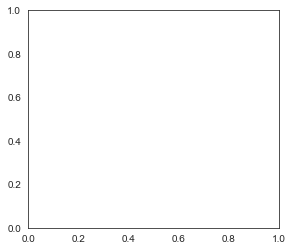

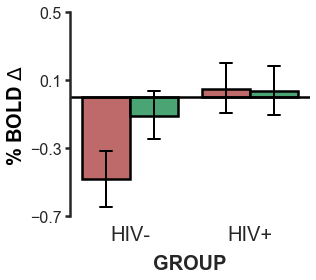

In [13]:

pal2 = sns.color_palette(['indianred', 'mediumseagreen'])
fig, ax = plt.subplots(figsize=(4.5, 4))

########### PCC ###############nested barplot for correct and error

df3 = df_long[df_long.metric.isin(['error', 'correct'])]

sns.barplot(x="HIV-status", y='value', hue="metric", data=df3, palette=pal2, errwidth=2, 
            errcolor='black', ax=ax, capsize=0.1, linewidth=2.5, edgecolor="black")

def change_width(ax, new_value) :
    locs = ax.get_xticks()
    for i,patch in enumerate(ax.patches):
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .4) 

ax.set_ylabel('% BOLD 'r'$\Delta$', fontsize=20, fontweight='bold', color ='black')
ax.set_xlabel('GROUP', fontsize=20, fontweight='bold', labelpad=10)
ax.set_yticks([-0.7, -0.3, 0.1, 0.5])
ax.set_ylim(-0.7, 0.5)
ax.tick_params(axis='both', labelsize=16, direction='out', length=5, left=True, width=2.5)
ax.tick_params(axis='x', labelsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.axhline(0, color='black', linewidth=2.5)
ax.legend().set_visible(False)
#ax.legend(fontsize=14, frameon = False, title = None, labelspacing = 0.5, 
          #loc = 'lower right')
#for tick in ax.xaxis.get_major_ticks():
    #tick.label1.set_fontweight('bold')
fig.tight_layout()
fig.savefig(fname='./figure_4/just_error_suppelmental_bar', dpi=300)
